In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import tree
#sklearn
import sklearn
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
# for scaling the data
from sklearn.preprocessing import scale
# for evaluating the model
import sklearn.metrics as sm
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


from sklearn.metrics import confusion_matrix,classification_report
# techniques used to handling imbalanced dataset
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
!pip install pandas_profiling
import pandas_profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.9/352.9 kB 39.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 12.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 59.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 34.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 44.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 85.8 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=98b7f1ae96c814a7e519b232a9c2e1b173447a7b154ac60d24dc69de5c2bb704
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attemp

<ipython-input-2-8d3dc5d12c9b>:32: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [3]:
file=pd.read_csv("/content/WeatherAustralia.csv")
file["RainTomorrow"].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [4]:
profile = pandas_profiling.ProfileReport(file) #this opens panda profiling report that give the user an overview of the data

profile.to_file('data_profile.html')

open('data_profile.html', 'r')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<_io.TextIOWrapper name='data_profile.html' mode='r' encoding='UTF-8'>

In [5]:
file

,MinTemp,MaxTemp,Rainfall,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Temp9am,Temp3pm,RainTomorrow
0,13.4,22.9,0.6,20.0,24.0,71.0,22.0,16.9,21.8,No
1,7.4,25.1,0.0,4.0,22.0,44.0,25.0,17.2,24.3,No
2,12.9,25.7,0.0,19.0,26.0,38.0,30.0,21.0,23.2,No
3,9.2,28.0,0.0,11.0,9.0,45.0,16.0,18.1,26.5,No
4,17.5,32.3,1.0,7.0,20.0,82.0,33.0,17.8,29.7,No
...,...,...,...,...,...,...,...,...,...,...
145398,22.5,37.7,0.0,33.0,26.0,22.0,11.0,28.8,37.2,NaN
145399,12.3,19.1,0.0,NaN,NaN,79.0,62.0,15.6,18.9,NaN
145400,14.2,18.7,NaN,9.0,NaN,81.0,67.0,16.6,17.5,NaN
145401,13.5,NaN,0.0,24.0,7.0,23.0,11.0,25.2,34.4,NaN


In [6]:
file.isnull().sum()     #cheking for null values

MinTemp         1431
MaxTemp         1207
Rainfall        3205
WindSpeed9am    1710
WindSpeed3pm    3007
Humidity9am     2597
Humidity3pm     4452
Temp9am         1710
Temp3pm         3554
RainTomorrow    3210
dtype: int64

In [ ]:
file.dropna(inplace=True)        #dropping the null values

In [ ]:
label=file["RainTomorrow"]

In [ ]:
file

,MinTemp,MaxTemp,Rainfall,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Temp9am,Temp3pm,RainTomorrow
0,13.4,22.9,0.6,20.0,24.0,71.0,22.0,16.9,21.8,No
1,7.4,25.1,0.0,4.0,22.0,44.0,25.0,17.2,24.3,No
2,12.9,25.7,0.0,19.0,26.0,38.0,30.0,21.0,23.2,No
3,9.2,28.0,0.0,11.0,9.0,45.0,16.0,18.1,26.5,No
4,17.5,32.3,1.0,7.0,20.0,82.0,33.0,17.8,29.7,No
...,...,...,...,...,...,...,...,...,...,...
142188,24.8,39.8,0.4,15.0,20.0,38.0,24.0,31.5,36.6,Yes
142189,19.3,24.4,0.0,7.0,19.0,28.0,91.0,21.3,18.5,Yes
142190,15.2,21.5,6.8,19.0,9.0,65.0,65.0,19.0,21.2,Yes
142191,17.7,26.9,12.6,15.0,20.0,93.0,59.0,19.0,26.0,Yes


In [ ]:
file.isnull().sum()          #to insure they got deleted

MinTemp         0
MaxTemp         0
Rainfall        0
WindSpeed9am    0
WindSpeed3pm    0
Humidity9am     0
Humidity3pm     0
Temp9am         0
Temp3pm         0
RainTomorrow    0
dtype: int64

In [ ]:
file.duplicated()           #to see if there are any duplication, or you can chech form pandas reporting

0         False
1         False
2         False
3         False
4         False
          ...  
142188    False
142189    False
142190    False
142191    False
142192    False
Length: 135643, dtype: bool

In [ ]:
le = preprocessing.LabelEncoder()                       #to change any categorical data numerical values

In [ ]:
heads=file.select_dtypes("object").columns

In [ ]:
for x in heads:
  file[x]=le.fit_transform(file[x])

In [ ]:
file.shape

(135643, 10)

In [ ]:
df = pd.DataFrame(file)

In [ ]:
file.corr()    #to check if there is high corrolation between features

,MinTemp,MaxTemp,Rainfall,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Temp9am,Temp3pm,RainTomorrow
MinTemp,1.000000,0.732821,0.105557,0.182821,0.180190,-0.239523,0.006524,0.901188,0.707929,0.087071
MaxTemp,0.732821,1.000000,-0.074394,0.019437,0.053927,-0.511114,-0.509727,0.885997,0.984508,-0.157416
Rainfall,0.105557,-0.074394,1.000000,0.087282,0.059521,0.223506,0.254915,0.011085,-0.078239,0.236918
WindSpeed9am,0.182821,0.019437,0.087282,1.000000,0.519963,-0.272026,-0.032032,0.133880,0.003896,0.089490
WindSpeed3pm,0.180190,0.053927,0.059521,0.519963,1.000000,-0.146254,0.017566,0.168781,0.027885,0.086966
Humidity9am,-0.239523,-0.511114,0.223506,-0.272026,-0.146254,1.000000,0.668768,-0.478824,-0.501629,0.256605
Humidity3pm,0.006524,-0.509727,0.254915,-0.032032,0.017566,0.668768,1.000000,-0.224063,-0.558577,0.447915
Temp9am,0.901188,0.885997,0.011085,0.133880,0.168781,-0.478824,-0.224063,1.000000,0.860740,-0.024234
Temp3pm,0.707929,0.984508,-0.078239,0.003896,0.027885,-0.501629,-0.558577,0.860740,1.000000,-0.191818
RainTomorrow,0.087071,-0.157416,0.236918,0.089490,0.086966,0.256605,0.447915,-0.024234,-0.191818,1.000000


In [ ]:
label=file["RainTomorrow"]

In [ ]:
file=file.drop(["RainTomorrow"],axis=1)         #dropping the rain tommorow

In [ ]:
file=file.drop(["Temp3pm"],axis=1)             #dropping it because of high corrolation with another feature

In [ ]:
scaler = MinMaxScaler()                     #this is for the normalization of the data and it makes the values betweem 1 and 0
file1=scaler.fit_transform(file)
df = pd.DataFrame(file1, columns=file.columns)

In [ ]:
df

,MinTemp,MaxTemp,Rainfall,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Temp9am
0,0.516509,0.523629,0.001617,0.229885,0.275862,0.71,0.22,0.508439
1,0.375000,0.565217,0.000000,0.045977,0.252874,0.44,0.25,0.514768
2,0.504717,0.576560,0.000000,0.218391,0.298851,0.38,0.30,0.594937
3,0.417453,0.620038,0.000000,0.126437,0.103448,0.45,0.16,0.533755
4,0.613208,0.701323,0.002695,0.080460,0.229885,0.82,0.33,0.527426
...,...,...,...,...,...,...,...,...
135638,0.785377,0.843100,0.001078,0.172414,0.229885,0.38,0.24,0.816456
135639,0.655660,0.551985,0.000000,0.080460,0.218391,0.28,0.91,0.601266
135640,0.558962,0.497164,0.018329,0.218391,0.103448,0.65,0.65,0.552743
135641,0.617925,0.599244,0.033962,0.172414,0.229885,0.93,0.59,0.552743


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(file1, label, test_size=0.15,random_state=0,shuffle=True)
y_train.value_counts()                #splitting the data into training and testing data, 45% to 15%

0    89873
1    25423
Name: RainTomorrow, dtype: int64

In [ ]:
ros = RandomOverSampler(random_state=0)                     #to handle imbalanced data
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled =ros.fit_resample(X_train, y_train)
X_resampled2, y_resampled2 =rus.fit_resample(X_train, y_train)

In [ ]:
y_resampled.value_counts()

1    89873
0    89873
Name: RainTomorrow, dtype: int64

In [ ]:
y_resampled2.value_counts()

0    25423
1    25423
Name: RainTomorrow, dtype: int64

In [ ]:
LR=LogisticRegression()              #training logestic regrition on the data
LR.fit(X_train,y_train)

LogisticRegression()

In [ ]:
pred=LR.predict(X_test)            #the predection of the output

In [ ]:
print("Accuracy="+'{:.2%}\n'.format(accuracy_score( y_test,pred)))                #print the preformance matrics
print("precision_score="+'{:.2%}\n'.format(precision_score(y_test, pred)))
print("recall_score="+'{:.2%}\n'.format(recall_score(y_test, pred)))
print(classification_report(y_test, pred))

Accuracy=83.44%

precision_score=72.26%

recall_score=39.97%

              precision    recall  f1-score   support

           0       0.85      0.96      0.90     15876
           1       0.72      0.40      0.51      4471

    accuracy                           0.83     20347
   macro avg       0.79      0.68      0.71     20347
weighted avg       0.82      0.83      0.82     20347



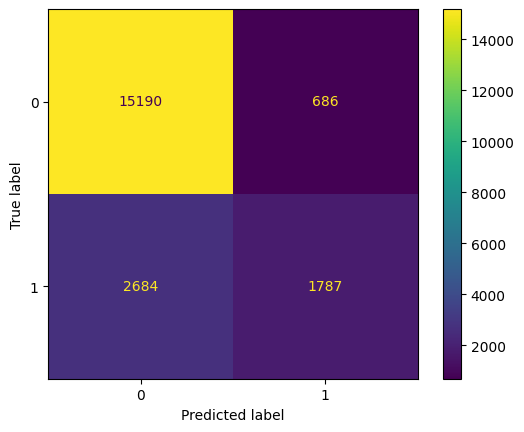

In [ ]:
cmp = ConfusionMatrixDisplay.from_estimator(LR, X_test, y_test,values_format='.222g')

In [ ]:
LRwithRandomOverSampler=LogisticRegression()                #training logestic regrition on the over sampled data if there is no balance in the data
LRwithRandomOverSampler.fit(X_resampled,y_resampled)

LogisticRegression()

In [ ]:
pred1=LRwithRandomOverSampler.predict(X_test)

In [ ]:
print("Accuracy="+'{:.2%}\n'.format(accuracy_score( y_test,pred1)))
print("precision_score="+'{:.2%}\n'.format(precision_score(y_test, pred1)))
print("recall_score="+'{:.2%}\n'.format(recall_score(y_test, pred1)))
print(classification_report(y_test, pred1))

Accuracy=74.63%

precision_score=45.25%

recall_score=73.65%

              precision    recall  f1-score   support

           0       0.91      0.75      0.82     15876
           1       0.45      0.74      0.56      4471

    accuracy                           0.75     20347
   macro avg       0.68      0.74      0.69     20347
weighted avg       0.81      0.75      0.76     20347



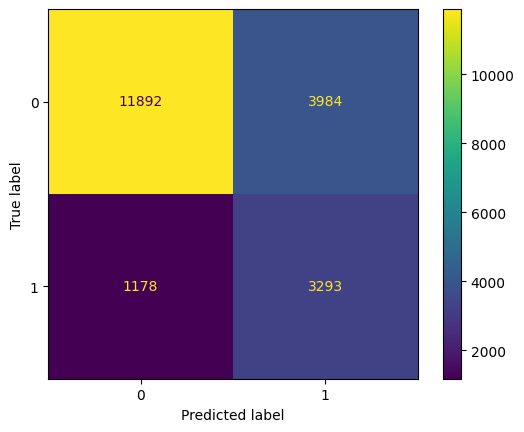

In [ ]:
cmp=ConfusionMatrixDisplay.from_estimator(LRwithRandomOverSampler, X_test, y_test,values_format='.222g')

In [ ]:
LRwithRandomUnderSampler=LogisticRegression()              #training logestic regrition on the under sampled data if there is no balance in the data
LRwithRandomUnderSampler.fit(X_resampled2,y_resampled2)

LogisticRegression()

In [ ]:
pred2=LRwithRandomUnderSampler.predict(X_test)

In [ ]:
print("Accuracy="+'{:.2%}\n'.format(accuracy_score( y_test,pred2)))
print("precision_score="+'{:.2%}\n'.format(precision_score(y_test, pred2)))
print("recall_score="+'{:.2%}\n'.format(recall_score(y_test, pred2)))
print(classification_report(y_test, pred2))

Accuracy=74.36%

precision_score=44.92%

recall_score=73.81%

              precision    recall  f1-score   support

           0       0.91      0.75      0.82     15876
           1       0.45      0.74      0.56      4471

    accuracy                           0.74     20347
   macro avg       0.68      0.74      0.69     20347
weighted avg       0.81      0.74      0.76     20347



<Figure size 500x500 with 0 Axes>

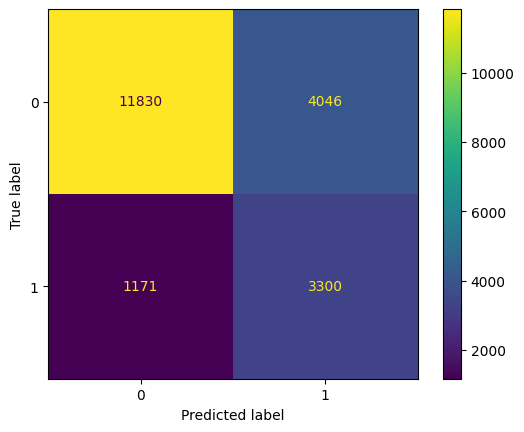

In [ ]:
plt.figure(figsize=(5, 5))
ConfusionMatrixDisplay.from_estimator(LRwithRandomUnderSampler, X_test, y_test,values_format='.222g')
plt.show()

In [ ]:
from keras.models import Sequential    #this creates a nural net that has three layers of dence layers, 45 units use the tanh AF
from keras.layers import Dense         #20 also use the tanh AF and in the last layer there is 1 unit using th segmoid AF
model = Sequential()
model.add(Dense(45, activation='tanh'))
model.add(Dense(20, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train, y_train, epochs=3, verbose=1)

Epoch 1/3
3603/3603 [==============================] - 9s 2ms/step - loss: 0.4129 - accuracy: 0.8276
Epoch 2/3
3603/3603 [==============================] - 8s 2ms/step - loss: 0.4011 - accuracy: 0.8320
Epoch 3/3
3603/3603 [==============================] - 8s 2ms/step - loss: 0.3972 - accuracy: 0.8335


In [ ]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (32, 45)                  405       
                                                                 
 dense_40 (Dense)            (32, 20)                  920       
                                                                 
 dense_41 (Dense)            (32, 1)                   21        
                                                                 
Total params: 1,346
Trainable params: 1,346
Non-trainable params: 0
_________________________________________________________________


In [ ]:
pred=model.predict(X_test)        #the predection of the output

636/636 [==============================] - 1s 2ms/step


In [ ]:
seq_predictions = list(map(lambda x: 0 if x<0.5 else 1, pred))     #it makes the predected values into binary values 1 & 0

In [ ]:
print("Accuracy="+'{:.2%}\n'.format(accuracy_score( y_test,seq_predictions)))              #print the preformance matrics
print("precision_score="+'{:.2%}\n'.format(precision_score(y_test, seq_predictions)))
print("recall_score="+'{:.2%}\n'.format(recall_score(y_test, seq_predictions)))
print(classification_report(y_test, seq_predictions))

Accuracy=83.39%

precision_score=67.56%

recall_score=46.99%

              precision    recall  f1-score   support

           0       0.86      0.94      0.90     15876
           1       0.68      0.47      0.55      4471

    accuracy                           0.83     20347
   macro avg       0.77      0.70      0.73     20347
weighted avg       0.82      0.83      0.82     20347



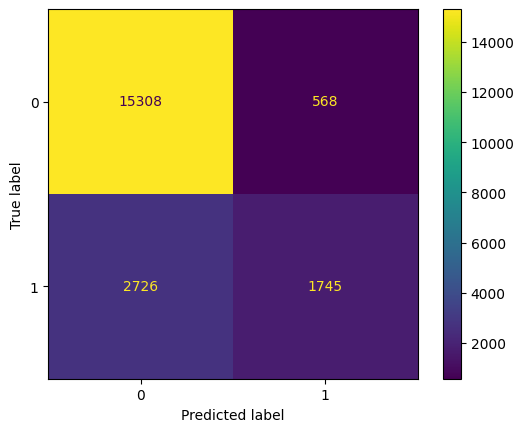

In [ ]:
cm = confusion_matrix(y_test, seq_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()